<a href="https://colab.research.google.com/github/a-ma-n/Deep-Dive-into-DL-1/blob/main/Deep_dive_into_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

 *Loading* the dataset from the in-built Datasets of Tensorflow:

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.


In [ ]:
x_train.shape

(60000, 28, 28)

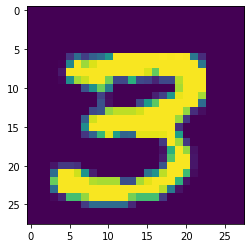

In [ ]:
plt.imshow(x_train[111])

In [ ]:
x_train[1].shape

(28, 28)

In [ ]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Normalizing the values:

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Building the Model :

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit() does the iterative approach that we have discussed and finds the 
best value for weights.

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4337 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0799 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9866


We Check how well the model is performing on the unseen data with model.evaluate()

In [ ]:
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9751


[0.07893384248018265, 0.9750999808311462]

### Importing ComputerVision library and testing a random image:


In [ ]:
import cv2

In [ ]:
def get_img(img_path, printer=True):
  original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  if printer: print ("original dim:",original_img.shape)

  resized_img = cv2.resize(original_img, (28,28))
  if printer: print ("resized dim:", resized_img.shape)

  return resized_img

original dim: (1280, 1280)
resized dim: (28, 28)


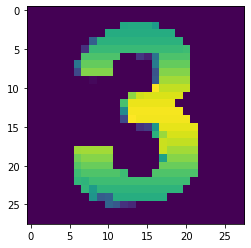

In [ ]:
img_path = "/content/Test 3.png"
resized_img = get_img(img_path)
plt.imshow(resized_img)

In [ ]:
resized_img= np.expand_dims(resized_img, axis=0)

In [ ]:
resized_img.shape

(1, 28, 28)

In [ ]:
pre=model.predict(resized_img)

In [ ]:
np.argmax(pre)

3

In [ ]:
pre

array([[-3759.5813  ,    62.272736,  1005.25555 ,  4204.1577  ,
        -3833.086   , -1220.7393  , -4881.258   , -1049.7988  ,
          488.7532  , -1892.4484  ]], dtype=float32)